# Liver Cirhosis Risk Prediction/Classification

## Data Preprocessing

In [56]:
import copy
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [57]:
#Load Dataset
cir_df = pd.read_csv("cirrhosis.csv")

In [58]:
#Check duplicate
len(pd.unique(cir_df["ID"])) == len(cir_df.index)

True

In [59]:
cir_df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

<Axes: >

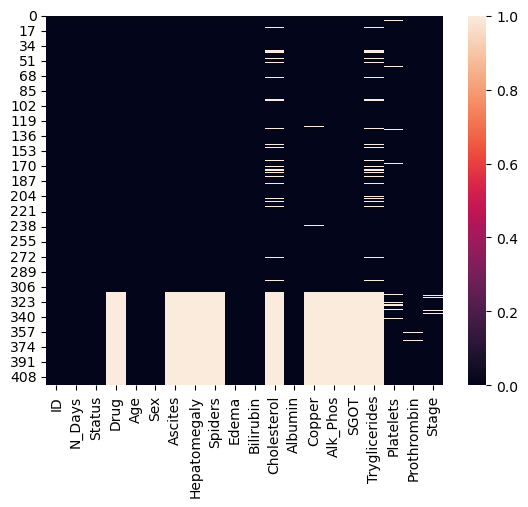

In [60]:
sns.heatmap(cir_df.isnull())

In [61]:
cir_df = cir_df.drop(columns = ["ID"])
#Drop rows with too much null value
cir_df = cir_df[cir_df["Drug"].isna() == False]
#Impute other null value with median
fill_values = {"Tryglicerides": np.nanmedian(cir_df["Tryglicerides"]), 
               "Platelets": np.nanmedian(cir_df["Platelets"]), 
               "Cholesterol": np.nanmedian(cir_df["Cholesterol"]), 
               "Copper": np.nanmedian(cir_df["Copper"])}
cir_df = cir_df.fillna(value = fill_values)
#Convert age into year
cir_df["Age"] = (cir_df["Age"]/365).astype('int')
#Replace binary values with 0,1
cir_df["Sex"] = np.where(cir_df["Sex"] == "M",1,0)
cir_df["Ascites"] = np.where(cir_df["Ascites"] == "Y",1,0)
cir_df["Hepatomegaly"] = np.where(cir_df["Hepatomegaly"] == "Y",1,0)
cir_df["Spiders"] = np.where(cir_df["Spiders"] == "Y",1,0)
cir_df["Drug"] = np.where(cir_df["Drug"] == "D-penicillamine",1,0)
#cir_df["Stage"] = "stage_" + cir_df["Stage"].astype(int).astype(str)

In [62]:
cir_df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,1,58,0,1,1,1,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,4500,C,1,56,0,0,1,1,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1012,D,1,70,1,0,0,0,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1925,D,1,54,0,0,1,1,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,1504,CL,0,38,0,0,1,1,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


## EDA

In [63]:
cir_df.describe()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000,312.000000
mean,2006.362179,0.506410,49.538462,0.115385,0.076923,0.512821,0.288462,3.256090,364.125000,3.520000,97.490385,1982.655769,122.556346,123.096154,261.871795,10.725641,3.032051
std,1123.280843,0.500762,10.590528,0.319999,0.266897,0.500639,0.453775,4.530315,221.923027,0.419892,85.360932,2140.388824,56.699525,62.122820,94.993533,1.004323,0.877880
min,41.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1191.000000,0.000000,41.750000,0.000000,0.000000,0.000000,0.000000,0.800000,255.750000,3.310000,41.750000,871.500000,80.600000,87.000000,200.000000,10.000000,2.000000
50%,1839.500000,1.000000,49.000000,0.000000,0.000000,1.000000,0.000000,1.350000,309.500000,3.550000,73.000000,1259.000000,114.700000,108.000000,257.000000,10.600000,3.000000
75%,2697.250000,1.000000,56.000000,0.000000,0.000000,1.000000,1.000000,3.425000,392.250000,3.800000,123.000000,1980.000000,151.900000,145.250000,322.000000,11.100000,4.000000
max,4556.000000,1.000000,78.000000,1.000000,1.000000,1.000000,1.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,17.100000,4.000000


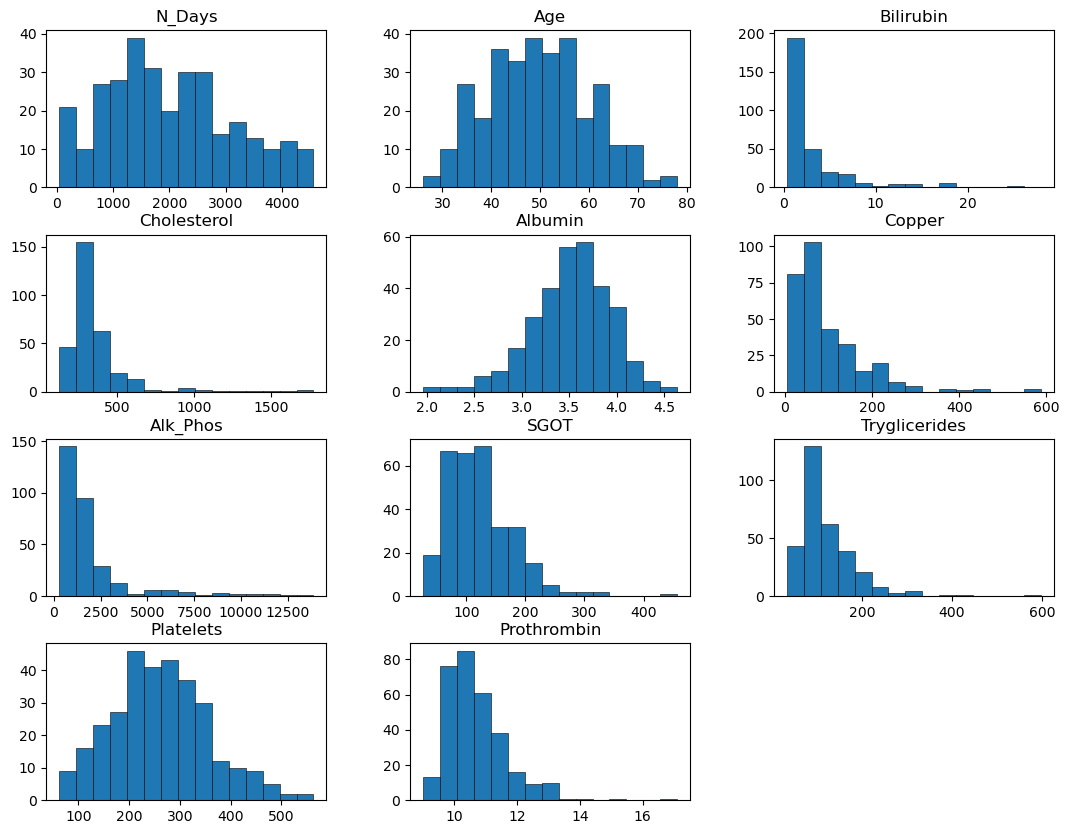

In [64]:
continous_df = cir_df.loc[:, ~cir_df.columns.isin(['Status', 'Stage', 'Edema','Drug','Sex','Ascites','Hepatomegaly','Spiders'])]
histogram = continous_df.hist(figsize=(13, 10), bins = 15 ,grid = False, edgecolor='black', linewidth = 0.4)

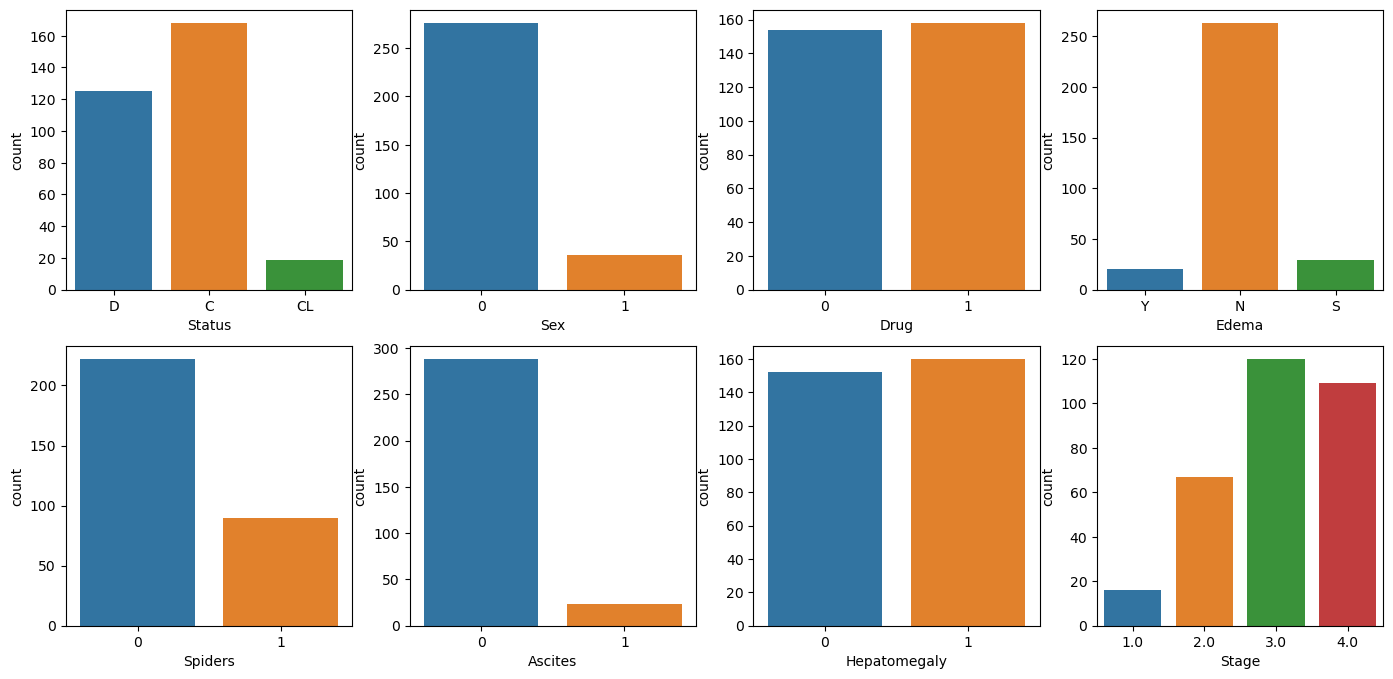

In [65]:
category_df = cir_df.loc[:, cir_df.columns.isin(['Status', 'Stage', 'Edema','Drug','Sex','Ascites','Hepatomegaly','Spiders'])]
fig, ax = plt.subplots(2, 4, figsize = (17,8))
axis = [['Status', 'Sex','Drug','Edema'],['Spiders','Ascites','Hepatomegaly','Stage']]
for i in range(2):
    for j in range(4):
        subplot = sns.countplot(ax = ax[i,j] ,x = axis[i][j], data = category_df)

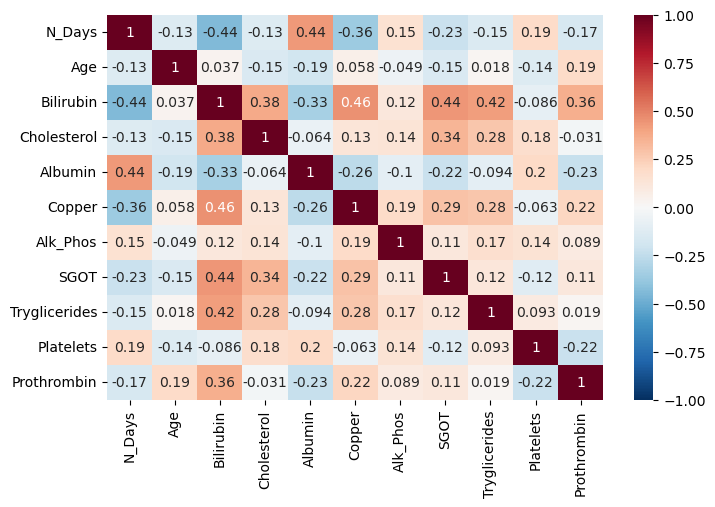

In [66]:
plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(continous_df.corr(), cmap = 'RdBu_r', vmin=-1, vmax=1, annot=True)

In [67]:
cir_df = cir_df.drop(columns = ['Status','N_Days'])

In [68]:
cir_df

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,58,0,1,1,1,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,1,56,0,0,1,1,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,1,70,1,0,0,0,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,1,54,0,0,1,1,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,0,38,0,0,1,1,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1,61,0,0,1,0,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,0,58,0,0,0,0,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,1,62,0,0,0,0,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,1,38,0,0,0,0,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


## Model

### XGBoost
#### Mainsteps:
1. Fit model using xgboost
1. Feature selection ***

In [69]:
#One-hot encoding
target = cir_df["Stage"]
target = target - 1
features = cir_df.drop(columns = ["Stage"])
features["Edema"] = features["Edema"].astype('category')
features = pd.get_dummies(features)

In [70]:
features["Edema_Y"] = features["Edema_Y"].astype('int')
features["Edema_S"] = features["Edema_S"].astype('int')
features["Edema_N"] = features["Edema_N"].astype('int')

In [71]:
target = np.where(target == 3,1,0)

In [72]:
#60,20,20 train,val,test,split
from sklearn.model_selection import train_test_split
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [73]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators=100, max_depth=10, eta=0.05)
model.fit(X_xgb_train, y_xgb_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [74]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_xgb_test, model.predict(X_xgb_test)))
rmse

0.4879500364742666

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(model.predict(X_xgb_test),y_xgb_test)

0.7619047619047619

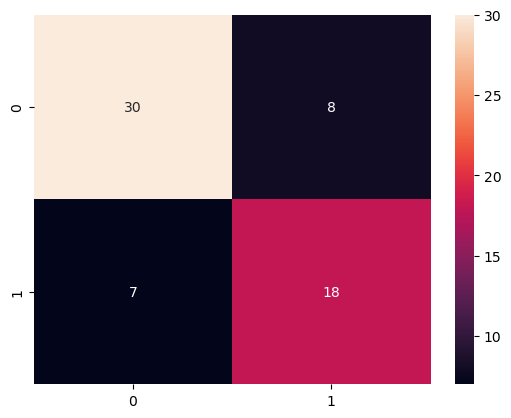

In [76]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(model.predict(X_xgb_test),y_xgb_test)
sns.heatmap(cm, annot=True)
plt.show()

In [77]:
print(classification_report(y_xgb_test,model.predict(X_xgb_test)))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80        37
           1       0.72      0.69      0.71        26

    accuracy                           0.76        63
   macro avg       0.75      0.75      0.75        63
weighted avg       0.76      0.76      0.76        63



In [78]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(model.predict(X_xgb_test),y_xgb_test)

0.5060115002613695

In [79]:
#dmatrix = xgb.DMatrix(data=X_xgb_train, label=y_xgb_train)
#params={'objective':'multi:softmax'}
#cv_results = xgb.cv(dtrain=dmatrix, params=params, nfold=10, metrics={'rmse'}, as_pandas=True, seed=20)
#print('RMSE: %.2f' % cv_results['test-rmse-mean'].min())

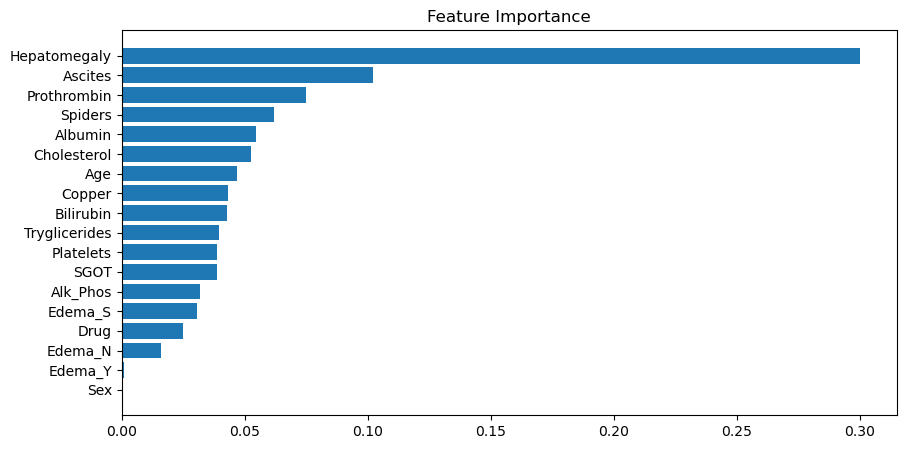

In [80]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(10, 5))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_xgb_test.columns)[sorted_idx])
plt.title('Feature Importance')
plt.show()

In [81]:
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=10, eta=0.05)
model2.fit(X_xgb_train[["Hepatomegaly","Ascites","Drug"]], y_xgb_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.05, eval_metric=None,
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)

In [82]:
rmse = np.sqrt(mean_squared_error(y_xgb_test, model2.predict(X_xgb_test[["Hepatomegaly","Ascites","Drug"]])))
rmse

0.563436169819011

In [83]:
accuracy_score(model2.predict(X_xgb_test[["Hepatomegaly","Ascites","Drug"]]),y_xgb_test)

0.6825396825396826

### Logistics Regression Model
#### Main steps:
1. Prepare duplicate dataset
1. Convert outcome (Stage) into categorical value
2. fit proportional odds model for remaining data
3. Feature selection (How?) ***

### Multilayer Perceptron Neural Network
#### Main steps:
1. Build function finding optimal number of layer and neurons (tensorflow).
2. Feature selection ***

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

scaler = sc.fit(features)
X_scaled = scaler.transform(features)

In [93]:
X_nn_train, X_nn_test, y_nn_train, y_nn_test = train_test_split(X_scaled, target, test_size=0.2, random_state=1)

In [144]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=(13,6),max_iter = 2000,activation = 'relu',solver = 'adam')
mlp_clf.fit(X_nn_train, y_nn_train)

MLPClassifier(hidden_layer_sizes=(13, 6), max_iter=2000)

In [145]:
y_pred = mlp_clf.predict(X_nn_test)
print('Accuracy: {:.2f}'.format(accuracy_score(y_nn_test, y_pred)))

Accuracy: 0.68


In [225]:
param_grid = {
    'hidden_layer_sizes': [(i,) for i in range(1,10)] + [(i,j) for i in range(4,10) for j in range(1,i)],
    'max_iter': [3000,4000],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.0005,0.001,0.005,0.01]
}

In [226]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(mlp_clf, param_grid, n_jobs= -1, cv=5)
grid.fit(X_nn_train, y_nn_train)
print(grid.best_params_) 

/Users/yixuanjiao/miniconda3/envs/ml_project/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3000) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu', 'alpha': 0.005, 'hidden_layer_sizes': (4, 2), 'max_iter': 4000, 'solver': 'adam'}


In [227]:
grid_predictions = grid.predict(X_nn_test) 
print('Accuracy: {:.2f}'.format(accuracy_score(y_nn_test, grid_predictions)))

Accuracy: 0.78


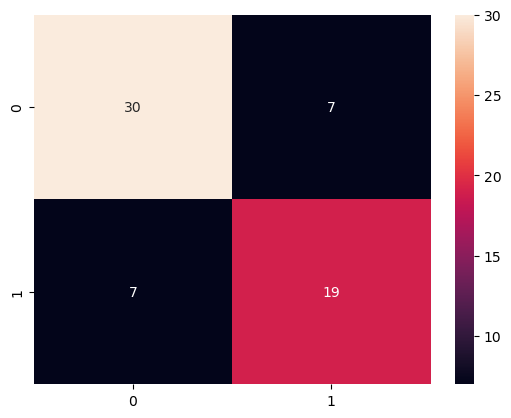

In [228]:
sns.heatmap(confusion_matrix(grid_predictions,y_nn_test),annot=True)
plt.show()

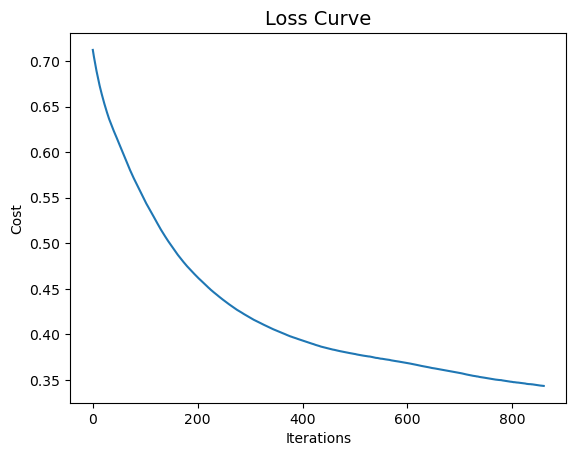

In [229]:
plt.plot(grid.best_estimator_.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

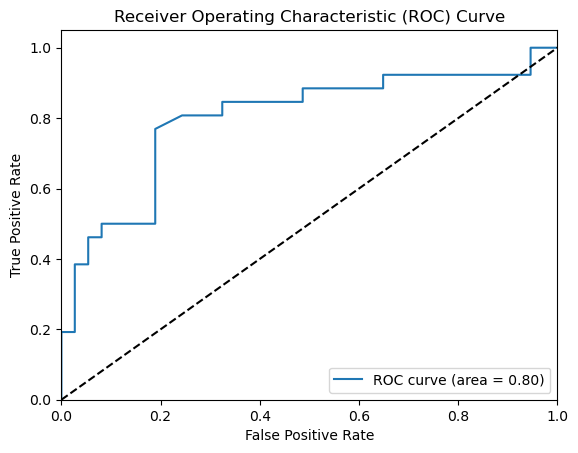

In [230]:
from sklearn.metrics import roc_curve,auc

y_proba = grid.predict_proba(X_nn_test)
fpr, tpr, thresholds = roc_curve(y_nn_test, y_proba[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--') # Random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [231]:
cohen_kappa_score(grid.best_estimator_.predict(X_nn_test),y_nn_test)

0.5415800415800416

## Performance Evaluation